In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/data_for_R/Non_masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(39602, 4921)


((595, 4921), (39602,))

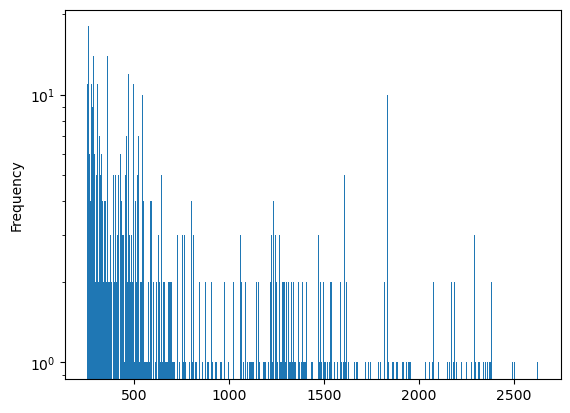

In [2]:

edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 98.5)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

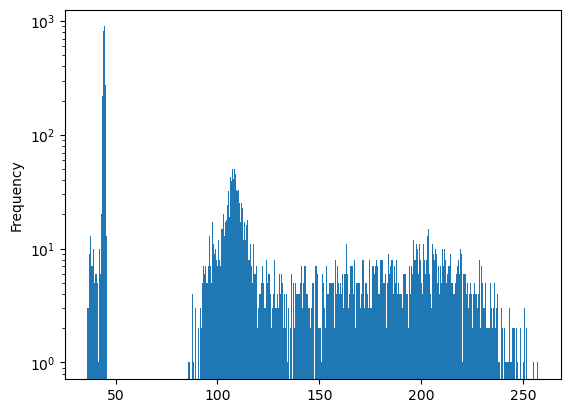

In [3]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [30]:
train_labels = pd.read_csv("./results/data/data_for_R/Non_Masked_train_labels.csv").drop('Unnamed: 0', axis=1)['0']

filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = list(train_labels)

filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

,156,159,352,362,369,398,472,593,645,646,...,37045,37180,37184,37405,37490,38046,38269,38368,38782,Label
0,0.015867,0.015598,0.378324,0.019166,0.018128,0.008623,0.009874,0.013534,0.984488,0.983065,...,0.022641,0.049569,0.011809,0.017022,0.008546,0.012614,0.078425,0.009363,0.113239,Control
1,0.016685,0.032502,0.157980,0.022074,0.017420,0.054726,0.037183,0.075331,0.918633,0.910109,...,0.046394,0.021781,0.028230,0.038130,0.077920,0.012650,0.098075,0.024050,0.124337,Control
2,0.026855,0.025722,0.013878,0.025502,0.027166,0.610366,0.505011,0.026643,0.013688,0.013790,...,0.025194,0.013895,0.027053,0.025045,0.013805,0.013851,0.013880,0.478146,0.013675,PKU
3,0.027739,0.026414,0.013713,0.026028,0.027353,0.577759,0.516573,0.027389,0.013734,0.013804,...,0.026054,0.013646,0.027001,0.024694,0.013743,0.013831,0.013774,0.525948,0.013810,PKU
4,0.011675,0.014865,0.846867,0.013198,0.011751,0.008226,0.009036,0.014990,0.985665,0.982234,...,0.012730,0.326519,0.011451,0.012385,0.008893,0.012128,0.154436,0.007765,0.243089,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.026680,0.025755,0.013727,0.025358,0.026554,0.632586,0.476707,0.026462,0.013754,0.013682,...,0.024794,0.013710,0.026558,0.024816,0.013589,0.013781,0.013711,0.480945,0.013790,PKU
4917,0.027890,0.027333,0.013673,0.026255,0.027376,0.536186,0.492210,0.026820,0.013606,0.013726,...,0.026015,0.013974,0.027513,0.025895,0.013667,0.013834,0.013727,0.499485,0.013730,PKU
4918,0.013508,0.013611,0.502068,0.015075,0.014920,0.010143,0.010665,0.018295,0.987663,0.987456,...,0.018587,0.063046,0.013588,0.016632,0.006961,0.012488,0.067422,0.010140,0.124064,Control
4919,0.027602,0.026437,0.013683,0.025551,0.027257,0.637111,0.459130,0.026497,0.013913,0.013834,...,0.024631,0.013619,0.027514,0.025289,0.013801,0.013695,0.013851,0.472664,0.013695,PKU


In [31]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [32]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

In [35]:
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})



edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]


In [34]:

edges_node_names_explainer_subgraphs.to_csv("./results/data/data_for_R/Non_masked_edges_node_names_explainer_subgraphs.csv")

In [38]:
pd.concat([edges_df, all_graphs_weights_df], axis=1).to_parquet("./results/data/data_for_R/Non_masked_ALL_edges_node_names_explainer_subgraphs.parquet.gzip", compression='gzip')